In [ ]:
!pip install unrar
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, validation_curve, learning_curve, GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix

In [ ]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00497/divorce.rar"
response = requests.get(URL)
open("divorce.rar", "wb").write(response.content)

33041

In [ ]:
!unrar x divorce.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from divorce.rar

Extracting  divorce.csv                                                    6%  OK 
Extracting  divorce.xlsx                                                  99%  OK 
All OK


In [ ]:
df = pd.read_csv('divorce.csv', skipinitialspace=True,index_col=False, delimiter=";")
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [ ]:
#Take a look at class distribution
df.groupby('Class').size()

Class
0    86
1    84
dtype: int64

In [ ]:
y = df["Class"]
X = df.drop(['Class'], axis=1)

In [ ]:
#Check correlations between features
corr_measure = X.corr()
#Sort features in descending order
corr_measure.loc['Atr1', :].sort_values(ascending=False)
#Pick the least 10 correlated
sorted_df = corr_measure.loc['Atr1', :].sort_values(ascending=False)
sorted_df.tail(10)

Atr42    0.642307
Atr48    0.633564
Atr53    0.611422
Atr47    0.582693
Atr52    0.575463
Atr45    0.510160
Atr43    0.482223
Atr7     0.427989
Atr46    0.400296
Atr6     0.287140
Name: Atr1, dtype: float64

In [ ]:
df = df[['Class', 'Atr42','Atr48','Atr53','Atr47','Atr52','Atr45','Atr43','Atr7','Atr46','Atr6' ]]
y = df["Class"]
X = df.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45, stratify=y)
X_train

,Atr42,Atr48,Atr53,Atr47,Atr52,Atr45,Atr43,Atr7,Atr46,Atr6
11,4,4,4,4,4,4,4,0,4,0
15,4,4,4,4,4,4,4,0,4,0
50,4,4,4,4,4,4,4,0,4,2
53,4,4,4,3,3,3,3,1,4,1
76,3,3,3,0,3,0,0,3,0,2
...,...,...,...,...,...,...,...,...,...,...
167,3,2,0,0,3,2,3,0,3,0
90,0,1,0,0,2,0,3,0,3,0
168,1,2,3,3,4,4,1,0,3,0
122,0,3,2,1,2,1,2,0,2,0


In [ ]:
time_train = np.zeros(5)
time_predict = np.zeros(5)
f1_score = np.zeros(5)

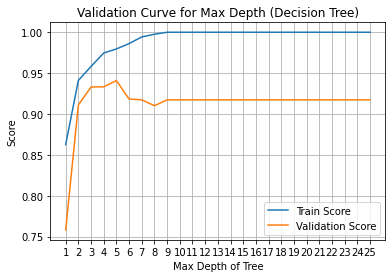

In [ ]:
clf = DecisionTreeClassifier(random_state=45)
max_depth_range = np.arange(1,26)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_range=max_depth_range, param_name='max_depth', cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(max_depth_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(max_depth_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Max Depth (Decision Tree)")
plt.xlabel("Max Depth of Tree")
plt.ylabel("Score")
plt.xticks(max_depth_range)
plt.grid()
plt.show()

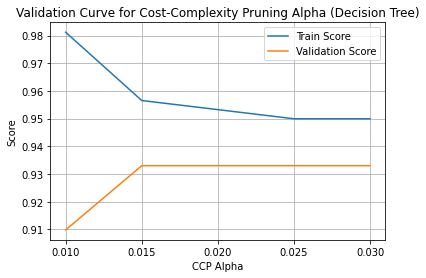

In [ ]:
ccp_alpha_range = np.linspace(0.01,0.03,5)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_range=ccp_alpha_range, param_name='ccp_alpha', cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(ccp_alpha_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(ccp_alpha_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Cost-Complexity Pruning Alpha (Decision Tree)")
plt.xlabel("CCP Alpha")
plt.ylabel("Score")
plt.xticks(ccp_alpha_range)
plt.grid()
plt.show()

In [ ]:
param_grid = {'max_depth': max_depth_range, 'ccp_alpha': ccp_alpha_range}

best_clf = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=45))

start_time = time.time()
best_clf.fit(X_train, y_train)
print("Best params for decision tree:",best_clf.best_params_)
end_time = time.time()
time_train[0] = end_time-start_time
print("Time to fit:",end_time -start_time)

start_time = time.time()
f1_score[0] = metrics.f1_score(y_test, best_clf.predict(X_test),average='macro')
end_time = time.time()
time_predict[0] = end_time-start_time
print("Time to predict:",end_time -start_time)

#f1_score of GridSerach best params
print("F1_score for GridSerach best decision tree:", f1_score[0])
#confusion matrix
print("Confusion matrix for GridSearch best params:")
print(confusion_matrix(y_test, best_clf.predict(X_test)))


#f1_score of single hyperparam tuning
dt_tuning = DecisionTreeClassifier(random_state=45, max_depth=5, ccp_alpha=0.015)
dt_tuning.fit(X_train, y_train)
f1_score_tuning = metrics.f1_score(y_test, dt_tuning.predict(X_test), average='macro')
print("F1_score for optimal values found from single hyperparameter tuning", f1_score_tuning)
#confusion matrix
print("Confusion matrix for single hyperparam tuning:")
print(confusion_matrix(y_test, dt_tuning.predict(X_test)))


#f1_score of sklearn default params
clf_default = DecisionTreeClassifier(random_state=45)
clf_default.fit(X_train, y_train)
f1_score_default = metrics.f1_score(y_test, clf_default.predict(X_test))
print("F1_score for sklearn default decision tree:", f1_score_default)
#confusion matrix
print("Confusion matrix for sklearn default params:")
print(confusion_matrix(y_test, clf_default.predict(X_test)))


Best params for decision tree: {'ccp_alpha': 0.01, 'max_depth': 3}
Time to fit: 12.860120296478271
Time to predict: 0.016143798828125
F1_score for GridSerach best decision tree: 0.9411764705882353
Confusion matrix for GridSearch best params:
[[16  1]
 [ 1 16]]
F1_score for optimal values found from single hyperparameter tuning 0.9411764705882353
Confusion matrix for single hyperparam tuning:
[[16  1]
 [ 1 16]]
F1_score for sklearn default decision tree: 0.8648648648648648
Confusion matrix for sklearn default params:
[[13  4]
 [ 1 16]]


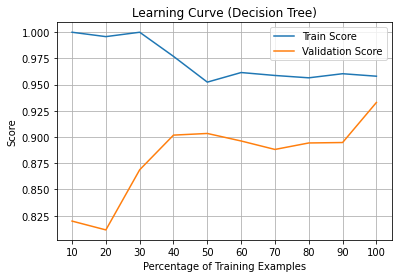

In [ ]:
dt_learner = DecisionTreeClassifier(random_state=45, max_depth=best_clf.best_params_['max_depth'], ccp_alpha=best_clf.best_params_['ccp_alpha'])
_, train_scores, test_scores = learning_curve(dt_learner, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10),  cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

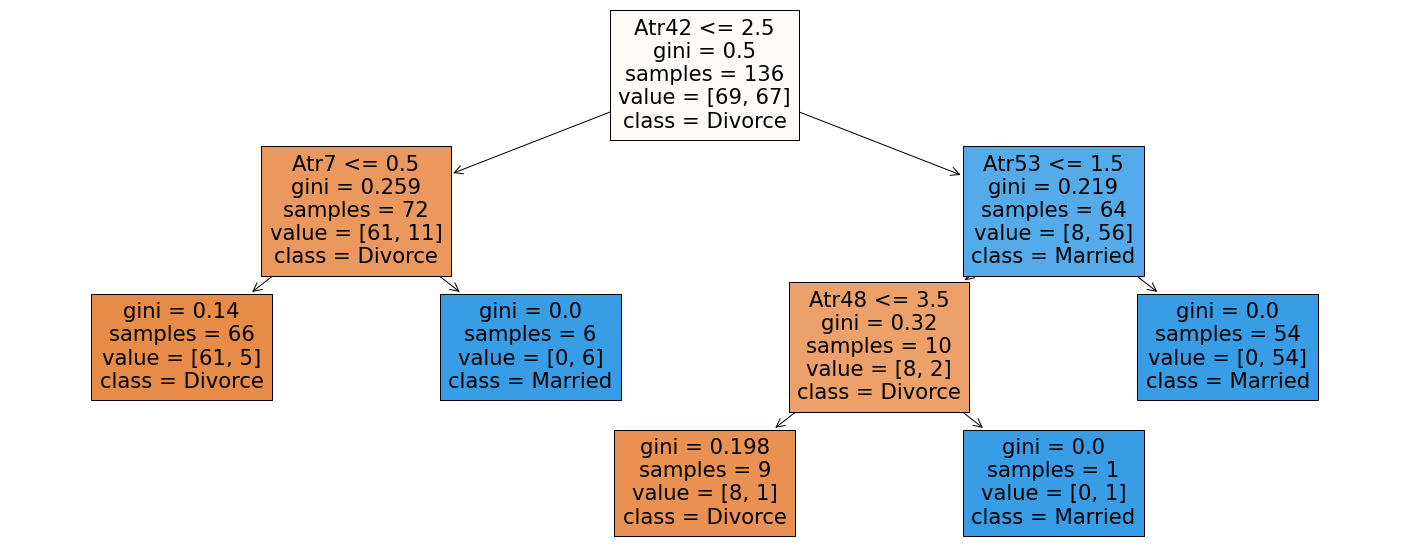

In [ ]:
#show decision tree from GridSearch best params
classifier_decision_tree_learning = DecisionTreeClassifier(random_state=45, max_depth=best_clf.best_params_['max_depth'], ccp_alpha=best_clf.best_params_['ccp_alpha'])
classifier_decision_tree_learning.fit(X_train, y_train)
best_max_depth_tree = best_clf.best_estimator_
feature_names = X.columns
class_names = ['Divorce', 'Married']
plt.figure(figsize=(25,10))
plot_tree(classifier_decision_tree_learning, feature_names =feature_names , class_names=class_names, filled=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


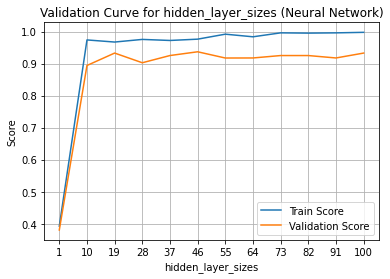

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(3,3,),random_state=45, max_iter=2000)
hidden_layer_sizes_list = np.arange(1, 101, 9)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_range=hidden_layer_sizes_list, param_name='hidden_layer_sizes', cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(hidden_layer_sizes_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(hidden_layer_sizes_list, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for hidden_layer_sizes (Neural Network)")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Score")
plt.xticks(hidden_layer_sizes_list)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

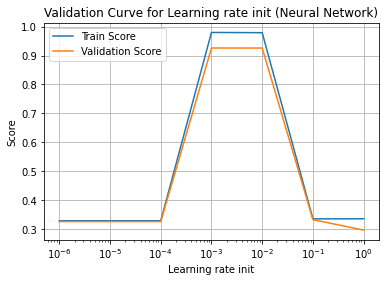

In [ ]:
learning_rate_init_range = np.logspace(-6,0,7)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_range=learning_rate_init_range, param_name='learning_rate_init', cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")
plt.figure()
plt.semilogx(learning_rate_init_range, np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(learning_rate_init_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Learning rate init (Neural Network)")
plt.xlabel("Learning rate init")
plt.ylabel("Score")
plt.xticks(learning_rate_init_range)
plt.grid()
plt.show()

In [ ]:
param_grid = {'hidden_layer_sizes': hidden_layer_sizes_list, 'learning_rate_init': learning_rate_init_range}

best_clf = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=45))
start_time = time.time()
best_clf.fit(X_train, y_train)
print("Best params for neural network:",best_clf.best_params_)
end_time = time.time()
time_train[1] = end_time-start_time
print("Time to fit:",end_time -start_time)

start_time = time.time()
f1_score[1] = metrics.f1_score(y_test, best_clf.predict(X_test),average='macro')
end_time = time.time()
time_predict[1] = end_time-start_time
print("Time to predict:",end_time -start_time)

#f1_score of GridSearch best params
print("F1_score for GridSerach best neural network:", f1_score[1])
#confusion matrix
print("Confusion matrix for GridSearch best params:")
print(confusion_matrix(y_test, best_clf.predict(X_test)))


#f1_score of sklearn default params
clf_default = MLPClassifier(random_state=45)
clf_default.fit(X_train, y_train)
f1_score_default = metrics.f1_score(y_test, clf_default.predict(X_test))
print("F1_score for sklearn default neutral network:", f1_score_default)
#confusion matrix
print("Confusion matrix for sklearn default params:")
print(confusion_matrix(y_test, clf_default.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

Best params for neural network: {'hidden_layer_sizes': 19, 'learning_rate_init': 0.001}
Time to fit: 285.72383427619934
Time to predict: 0.0056726932525634766
F1_score for GridSerach best neural network: 0.9705627705627706
Confusion matrix for GridSearch best params:
[[17  0]
 [ 1 16]]
F1_score for sklearn default neutral network: 0.9411764705882353
Confusion matrix for sklearn default params:
[[16  1]
 [ 1 16]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


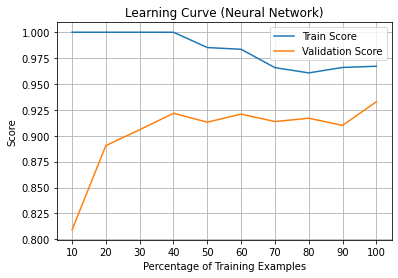

In [ ]:
nn_learner = MLPClassifier(hidden_layer_sizes=(best_clf.best_params_['hidden_layer_sizes'], ), random_state=45, max_iter=2000, learning_rate_init=best_clf.best_params_['learning_rate_init'])
_, train_scores, test_scores = learning_curve(nn_learner, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10),  cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (Neural Network)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

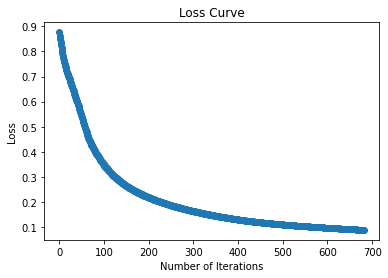

In [ ]:
nn_learner.fit(X_train, y_train)
loss_curve = nn_learner.loss_curve_
plt.figure()
plt.title("Loss Curve")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.plot(loss_curve, 'o-', label='Train')
plt.show()

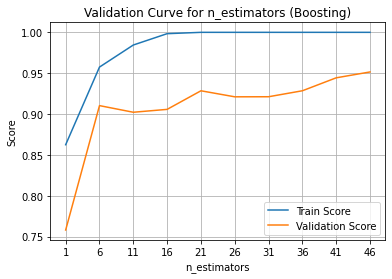

In [ ]:
clf = AdaBoostClassifier(random_state=45)
n_estimators_range = np.arange(1,50, 5)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="n_estimators", param_range=n_estimators_range, cv = KFold(n_splits=10, shuffle=True,random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(n_estimators_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(n_estimators_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for n_estimators (Boosting)")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.xticks(n_estimators_range)
plt.grid()
plt.show()

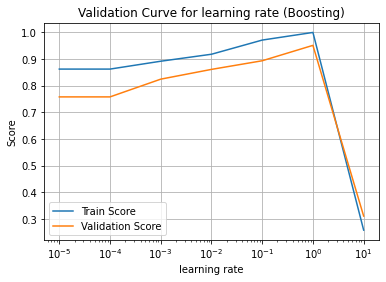

In [ ]:
learning_rate_range = np.logspace(-5,1,7)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="learning_rate", param_range=learning_rate_range, cv = KFold(n_splits=10, shuffle=True,random_state=45), scoring="f1_macro")
plt.figure()
plt.semilogx(learning_rate_range, np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(learning_rate_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for learning rate (Boosting)")
plt.xlabel("learning rate")
plt.ylabel("Score")
plt.xticks(learning_rate_range)
plt.grid()
plt.show()

In [ ]:
param_grid = {'n_estimators': n_estimators_range, 'learning_rate': learning_rate_range}

best_clf = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=45))
start_time = time.time()
best_clf.fit(X_train, y_train)
print("GridSearch best params for boosting:",best_clf.best_params_)
end_time = time.time()
time_train[2] = end_time-start_time
print("Time to fit:",end_time -start_time)

start_time = time.time()
f1_score[2] = metrics.f1_score(y_test, best_clf.predict(X_test),average='macro')
end_time = time.time()
time_predict[2] = end_time-start_time
print("Time to predict:",end_time -start_time)

#f1_score of GridSearch best params
print("F1_score for GridSearch best boosting:", f1_score[2])
#confusion matrix
print("Confusion matrix for GridSearch best params:")
print(confusion_matrix(y_test, best_clf.predict(X_test)))


#f1_score of optimal values from tuning
adaboost_tuning = AdaBoostClassifier(random_state=45, learning_rate=1, n_estimators=6)
adaboost_tuning.fit(X_train, y_train)
f1_score_tuning = metrics.f1_score(y_test, adaboost_tuning.predict(X_test), average='macro')
print("F1_score for optimal values found from tuning", f1_score_tuning)
#confusion matrix
print("Confusion matrix for single hyperparam tuning:")
print(confusion_matrix(y_test, adaboost_tuning.predict(X_test)))


#f1_score of sklearn default params
clf_default = AdaBoostClassifier(random_state=45)
clf_default.fit(X_train, y_train)
f1_score_default = metrics.f1_score(y_test, clf_default.predict(X_test))
print("F1_score for default boosting:", f1_score_default)
#confusion matrix
print("Confusion matrix for sklearn default params:")
print(confusion_matrix(y_test, clf_default.predict(X_test)))

GridSearch best params for boosting: {'learning_rate': 1.0, 'n_estimators': 46}
Time to fit: 26.529884576797485
Time to predict: 0.016155719757080078
F1_score for GridSearch best boosting: 0.8807017543859649
Confusion matrix for GridSearch best params:
[[13  4]
 [ 0 17]]
F1_score for optimal values found from tuning 0.9110723626852659
Confusion matrix for single hyperparam tuning:
[[14  3]
 [ 0 17]]
F1_score for default boosting: 0.8947368421052632
Confusion matrix for sklearn default params:
[[13  4]
 [ 0 17]]


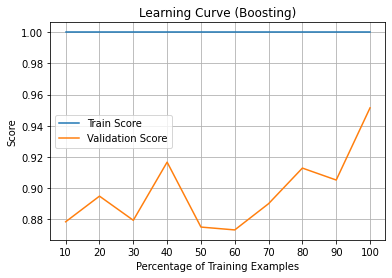

In [ ]:
#plot learning curve using grid serach best params
adaboost_gridsearch = AdaBoostClassifier(random_state=45, learning_rate=best_clf.best_params_['learning_rate'], n_estimators=best_clf.best_params_['n_estimators'])
_, train_scores, test_scores = learning_curve(adaboost_gridsearch, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10),  cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (Boosting)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

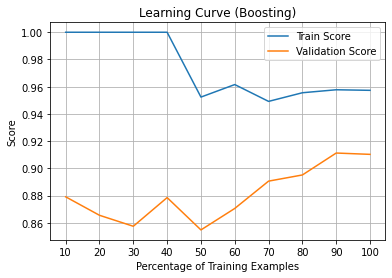

In [ ]:
#plot learning curve using optimal values found from tuning
adaboost_tuning = AdaBoostClassifier(random_state=45, learning_rate=1, n_estimators=6)
_, train_scores, test_scores = learning_curve(adaboost_tuning, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10),  cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (Boosting)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

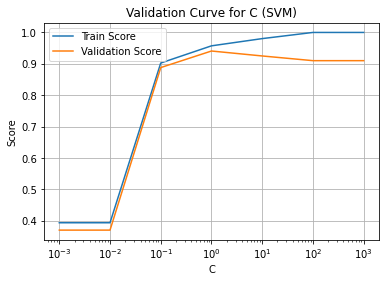

In [ ]:
c_range =np.logspace(-3,3,7)
clf = SVC(random_state=45)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="C", param_range=c_range, cv = KFold(n_splits=10, shuffle=True,random_state=45), scoring="f1_macro")
plt.figure()
plt.semilogx(c_range, np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(c_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for C (SVM)")
plt.xlabel("C")
plt.ylabel("Score")
plt.xticks(c_range)
plt.grid()
plt.show()

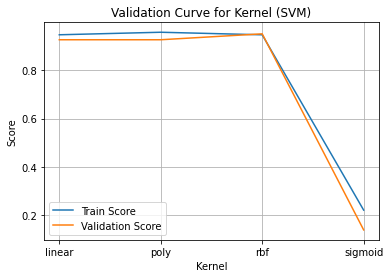

In [ ]:
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
train_scores = np.zeros((4,1))
test_scores = np.zeros((4,1))
def get_train_test_scores(X_train, y_train, kernel):
  model = SVC(random_state=45, kernel=kernel)
  X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.3, random_state=45)
  model.fit(X_train_train, y_train_train)
  train_scores = metrics.f1_score(y_train_train, model.predict(X_train_train), average='macro')
  test_scores = metrics.f1_score(y_train_val, model.predict(X_train_val), average='macro')
  return train_scores, test_scores
for i in range(0, 4):
  train_scores[i], test_scores[i] = get_train_test_scores(X_train, y_train, kernel_range[i])
plt.figure()
plt.plot(np.arange(4), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(4), np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Kernel (SVM)")
plt.xlabel("Kernel")
plt.ylabel("Score")
plt.xticks(np.arange(4),kernel_range)
plt.grid()
plt.show()

In [ ]:
param_grid = {'C': c_range, 'kernel': kernel_range}

best_clf = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=45))
start_time = time.time()
best_clf.fit(X_train, y_train)
print("Best params for SVM:",best_clf.best_params_)
end_time = time.time()
time_train[3] = end_time-start_time
print("Time to fit:",end_time -start_time)

start_time = time.time()
f1_score[3] = metrics.f1_score(y_test, best_clf.predict(X_test),average='macro')
end_time = time.time()
time_predict[3] = end_time-start_time
print("Time to predict:",end_time -start_time)

#f1_score of GridSearch best params
print("F1_score for best SVM:", f1_score[3])
#confusion matrix
print("Confusion matrix for GridSearch best params:")
print(confusion_matrix(y_test, best_clf.predict(X_test)))


#f1_score of optimal values from tuning
svm_tuning = SVC(random_state=45, kernel='rbf', C=1)
svm_tuning.fit(X_train, y_train)
f1_score_tuning = metrics.f1_score(y_test, svm_tuning.predict(X_test), average='macro')
print("F1_score for optimal values found from tuning", f1_score_tuning)
#confusion matrix
print("Confusion matrix for single hyperparam tuning:")
print(confusion_matrix(y_test, svm_tuning.predict(X_test)))


#f1_score of sklearn default params
clf_default = SVC(random_state=45)
clf_default.fit(X_train, y_train)
f1_score_default = metrics.f1_score(y_test, clf_default.predict(X_test))
print("F1_score for default SVM:", f1_score_default)
#confusion matrix
print("Confusion matrix for sklearn default params:")
print(confusion_matrix(y_test, clf_default.predict(X_test)))

Best params for SVM: {'C': 1.0, 'kernel': 'rbf'}
Time to fit: 2.348471164703369
Time to predict: 0.004060983657836914
F1_score for best SVM: 0.9705627705627706
Confusion matrix for GridSearch best params:
[[17  0]
 [ 1 16]]
F1_score for optimal values found from tuning 0.9705627705627706
Confusion matrix for single hyperparam tuning:
[[17  0]
 [ 1 16]]
F1_score for default SVM: 0.9696969696969697
Confusion matrix for sklearn default params:
[[17  0]
 [ 1 16]]


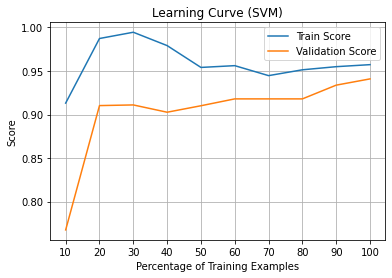

In [ ]:
svm_learner = SVC(random_state=45, C=best_clf.best_params_['C'], kernel=best_clf.best_params_['kernel'])
_, train_scores, test_scores = learning_curve(svm_learner, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10),  cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (SVM)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

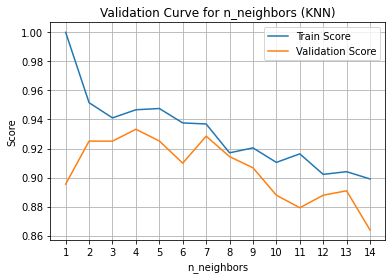

In [ ]:
clf = KNeighborsClassifier()
n_neighbors_range = np.arange(1,15)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="n_neighbors", param_range=n_neighbors_range, cv = KFold(n_splits=10, shuffle=True,random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(n_neighbors_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(n_neighbors_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for n_neighbors (KNN)")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.xticks(n_neighbors_range)
plt.grid()
plt.show()

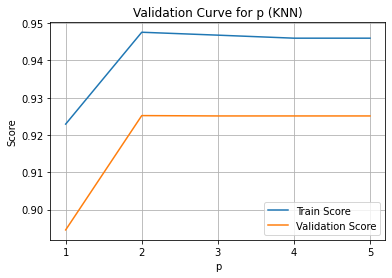

In [ ]:
p_range = np.arange(1,6)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="p", param_range=p_range, cv = KFold(n_splits=10, shuffle=True,random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(p_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(p_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for p (KNN)")
plt.xlabel("p")
plt.ylabel("Score")
plt.xticks(p_range)
plt.grid()
plt.show()

In [ ]:
param_grid = {'p': p_range, 'n_neighbors': n_neighbors_range}

best_clf = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=45))
start_time = time.time()
best_clf.fit(X_train, y_train)
print("Best params for KNN:",best_clf.best_params_)
end_time = time.time()
time_train[4] = end_time-start_time
print("Time to fit:",end_time -start_time)

start_time = time.time()
f1_score[4] = metrics.f1_score(y_test, best_clf.predict(X_test),average='macro')
end_time = time.time()
time_predict[4] = end_time-start_time
print("Time to predict:",end_time -start_time)

#f1_score of GridSearch best params
print("F1_score for GridSearch best KNN:", f1_score[4])
#confusion matrix
print("Confusion matrix for GridSearch best params:")
print(confusion_matrix(y_test, best_clf.predict(X_test)))


#f1_score of single hyperparam tuning
knn_tuning = KNeighborsClassifier(n_neighbors=4, p=2)
knn_tuning.fit(X_train, y_train)
f1_score_tuning = metrics.f1_score(y_test, knn_tuning.predict(X_test), average='macro')
print("p=2, F1_score =", f1_score_tuning)
#confusion matrix
print("Confusion matrix for sklearn default params:")
print(confusion_matrix(y_test, knn_tuning.predict(X_test)))
#varing p while keeping K=4
print("Varing p while keeping K=4")
knn_tuning_p2 = KNeighborsClassifier(n_neighbors=4, p=2)
knn_tuning_p2.fit(X_train, y_train)
f1_score_p2 = metrics.f1_score(y_test, knn_tuning_p2.predict(X_test), average='macro')
print("p=2, F1_score =", f1_score_p2)

knn_tuning_p3 = KNeighborsClassifier(n_neighbors=4, p=3)
knn_tuning_p3.fit(X_train, y_train)
f1_score_p3 = metrics.f1_score(y_test, knn_tuning_p3.predict(X_test), average='macro')
print("p=3, F1_score =", f1_score_p3)

knn_tuning_p4 = KNeighborsClassifier(n_neighbors=4, p=4)
knn_tuning_p4.fit(X_train, y_train)
f1_score_p4 = metrics.f1_score(y_test, knn_tuning_p4.predict(X_test), average='macro')
print("p=4, F1_score =", f1_score_p4)


#f1_score of sklearn default params
clf_default = KNeighborsClassifier()
clf_default.fit(X_train, y_train)
f1_score_default = metrics.f1_score(y_test, clf_default.predict(X_test))
print("F1_score for default KNN:", f1_score_default)
#confusion matrix
print("Confusion matrix for sklearn default params:")
print(confusion_matrix(y_test, clf_default.predict(X_test)))

Best params for KNN: {'n_neighbors': 4, 'p': 3}
Time to fit: 3.6656999588012695
Time to predict: 0.0063784122467041016
F1_score for GridSearch best KNN: 0.9116883116883117
Confusion matrix for GridSearch best params:
[[15  2]
 [ 1 16]]
p=2, F1_score = 0.9116883116883117
Confusion matrix for sklearn default params:
[[15  2]
 [ 1 16]]
Varing p while keeping K=4
p=2, F1_score = 0.9116883116883117
p=3, F1_score = 0.9116883116883117
p=4, F1_score = 0.9116883116883117
F1_score for default KNN: 0.8888888888888888
Confusion matrix for sklearn default params:
[[14  3]
 [ 1 16]]


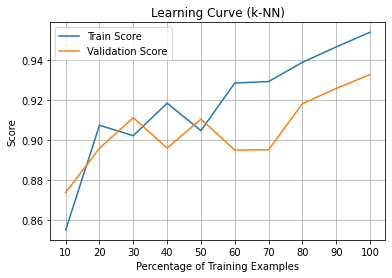

In [ ]:
classifier_knn_learning = KNeighborsClassifier(n_neighbors=best_clf.best_params_['n_neighbors'], p=best_clf.best_params_['p'])
_, train_scores, test_scores = learning_curve(classifier_knn_learning, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (k-NN)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

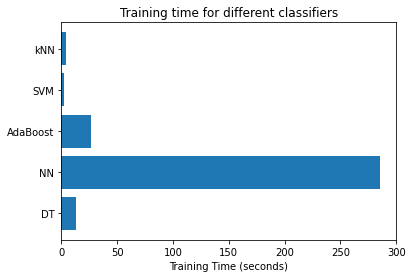

In [ ]:
classifiers = ('DT', 'NN', 'AdaBoost', 'SVM','kNN' )
y_ticks = np.arange(len(classifiers))
plt.figure()
plt.barh(y_ticks, time_train)
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('Training time for different classifiers')
plt.xlabel('Training Time (seconds)')
plt.show()

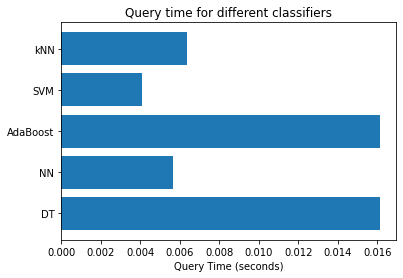

In [ ]:
plt.figure()
plt.barh(y_ticks, time_predict)
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('Query time for different classifiers')
plt.xlabel('Query Time (seconds)')
plt.show()

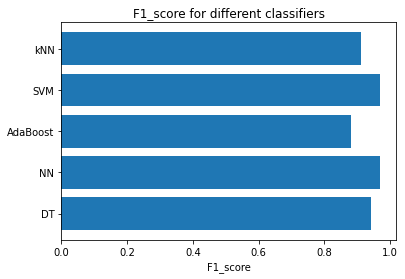

In [ ]:
plt.figure()
plt.barh(y_ticks, f1_score)
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('F1_score for different classifiers')
plt.xlabel('F1_score')
plt.show()